# Featurization, Model Selection & Tuning Project

## Objective:
To model the strength of high performance concrete using Machine Learning

## Data Description:
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations)

## Domain:
Cement Manufacturing

## Context:
Concrete is the most important material in civil engineering. The concrete
compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.

## Attribute Information:
 Cement : measured in kg in a m3 mixture

 Blast : measured in kg in a m3 mixture

 Fly ash : measured in kg in a m3 mixture

 Water : measured in kg in a m3 mixture

 Superplasticizer : measured in kg in a m3 mixture

 Coarse Aggregate : measured in kg in a m3 mixture

 Fine Aggregate : measured in kg in a m3 mixture

 Age : day (1~365)

 Concrete compressive strength measured in MPa

### Import Libraries & load dataset

In [1]:
import pandas as pd                    # for data analysis & manipulation
import numpy as np                     # array handling
import matplotlib.pyplot as plt        # visualization library
%matplotlib inline
import seaborn as sns                  # visualization library
from scipy import stats                # stats library for descriptive statistics 
from scipy.stats import zscore         # for feature scaling
from sklearn.model_selection import train_test_split # to split the dataset into training and testing data 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics            # import metrics for model score calculation
from sklearn.model_selection import KFold,cross_val_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.utils import resample


In [2]:
#Read dataset into a pandas dataframe
df = pd.read_csv('C:\\Users\\Srikanta\\Desktop\\Great Learning\\Python Files\\Week 21 Featurization, model selection and tuning project\\concrete.csv')

#Check if the dataset is loaded into a dataframe correctly
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
#Check the number of rows and columns in our data
df.shape
print('Our dataset has {0} rows and {1} features'.format(df.shape[0],df.shape[1]))

Our dataset has 1030 rows and 9 features


In [4]:
#Checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


We have 8 independent variables of which the variable 'age' is of datatype 'int64' and the remaining 7 are of type 'float64'. The target variable is also of type 'float64'. All the records are numeric. There are no null values.

In [5]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratory Data Analysis

### i) Univariate Analysis

#### a) Cement

In [6]:
Q1 = df['cement'].quantile(0.25)
Q3 = df['cement'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['cement'].min())
print('Maximum value is:',df['cement'].max())
print('Range of values is:',df['cement'].max()-df['cement'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['cement'].mean(),3),df['cement'].median()))
print('Standard deviation is:',round(df['cement'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['cement']))

Minimum value is: 102.0
Maximum value is: 540.0
Range of values is: 438.0
Central values of mean and median respectively are:281.168 and 272.9
Standard deviation is: 104.506
First Quartile is: 192.375
Third Quartile is: 350.0
Inter Quartile Range is: 157.625


In [7]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in cement: ', Low_Outlier)
print('Upper outliers in cement: ', Up_Outlier)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [8]:
print('No. of upper outliers in cement : ', df[df['cement']>586.4375]['cement'].count())
print('No. of lower outliers in cement : ', df[df['cement']<-44.0625]['cement'].count())

No. of upper outliers in cement :  0
No. of lower outliers in cement :  0


In [9]:
#skewness
df['cement'].skew()

0.5094811788717731

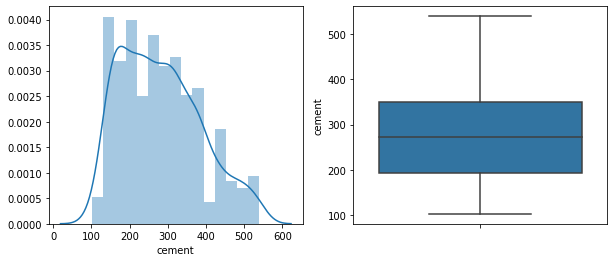

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['cement'])  #Distribution of cement variable

plt.subplot(1,2,2)
sns.boxplot(df['cement'],orient='v') #Outlier detection using box plot

plt.show()

#### b) Slag

In [11]:
Q1 = df['slag'].quantile(0.25)
Q3 = df['slag'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['slag'].min())
print('Maximum value is:',df['slag'].max())
print('Range of values is:',df['slag'].max()-df['slag'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['slag'].mean(),3),df['slag'].median()))
print('Standard deviation is:',round(df['slag'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['slag']))

Minimum value is: 0.0
Maximum value is: 359.4
Range of values is: 359.4
Central values of mean and median respectively are:73.896 and 22.0
Standard deviation is: 86.279
First Quartile is: 0.0
Third Quartile is: 142.95
Inter Quartile Range is: 142.95


In [12]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in slag: ', Low_Outlier)
print('Upper outliers in slag: ', Up_Outlier)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [13]:
print('No. of upper outliers in cement : ', df[df['slag']>357.375]['slag'].count())
print('No. of lower outliers in cement : ', df[df['slag']<-214.42499999999998]['slag'].count())

No. of upper outliers in cement :  2
No. of lower outliers in cement :  0


In [14]:
#skewness
df['slag'].skew()

0.8007168956061774

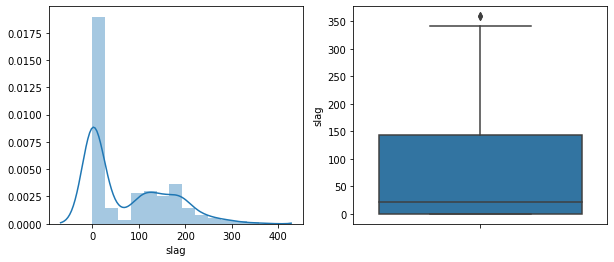

In [15]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['slag'])  #Distribution of slag variable

plt.subplot(1,2,2)
sns.boxplot(df['slag'],orient='v') #Outlier detection using box plot

plt.show()

#### c) ash

In [16]:
Q1 = df['ash'].quantile(0.25)
Q3 = df['ash'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['ash'].min())
print('Maximum value is:',df['ash'].max())
print('Range of values is:',df['ash'].max()-df['ash'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['ash'].mean(),3),df['ash'].median()))
print('Standard deviation is:',round(df['ash'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['ash']))

Minimum value is: 0.0
Maximum value is: 200.1
Range of values is: 200.1
Central values of mean and median respectively are:54.188 and 0.0
Standard deviation is: 63.997
First Quartile is: 0.0
Third Quartile is: 118.3
Inter Quartile Range is: 118.3


In [17]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in ash: ', Low_Outlier)
print('Upper outliers in ash: ', Up_Outlier)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [18]:
print('No. of upper outliers in ash : ', df[df['ash']>295.75]['ash'].count())
print('No. of lower outliers in ash : ', df[df['ash']<-177.45]['ash'].count())

No. of upper outliers in ash :  0
No. of lower outliers in ash :  0


In [19]:
#skewness
df['ash'].skew()

0.5373539058066844

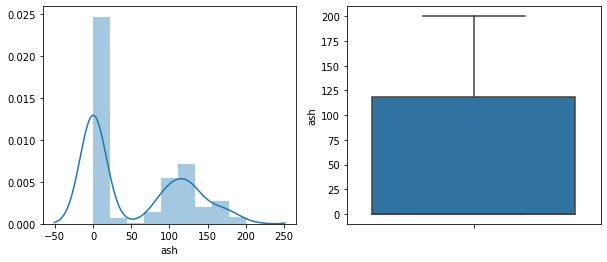

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['ash'])  #Distribution of ash variable

plt.subplot(1,2,2)
sns.boxplot(df['ash'],orient='v') #Outlier detection using box plot

plt.show()

#### d) Water

In [21]:
Q1 = df['water'].quantile(0.25)
Q3 = df['water'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['water'].min())
print('Maximum value is:',df['water'].max())
print('Range of values is:',df['water'].max()-df['water'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['water'].mean(),3),df['water'].median()))
print('Standard deviation is:',round(df['water'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['water']))

Minimum value is: 121.8
Maximum value is: 247.0
Range of values is: 125.2
Central values of mean and median respectively are:181.567 and 185.0
Standard deviation is: 21.354
First Quartile is: 164.9
Third Quartile is: 192.0
Inter Quartile Range is: 27.099999999999994


In [22]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in water: ', Low_Outlier)
print('Upper outliers in water: ', Up_Outlier)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [23]:
print('No. of upper outliers in water : ', df[df['water']>232.64999999999998]['water'].count())
print('No. of lower outliers in water : ', df[df['water']<124.25000000000001]['water'].count())

No. of upper outliers in water :  4
No. of lower outliers in water :  5


In [24]:
#skewness
df['water'].skew()

0.07462838428549402

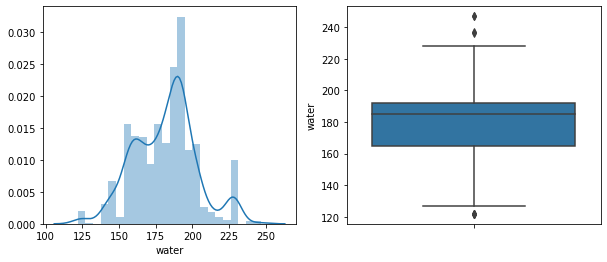

In [25]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['water'])  #Distribution of ash variable

plt.subplot(1,2,2)
sns.boxplot(df['water'],orient='v') #Outlier detection using box plot

plt.show()

#### e) Superplastic

In [26]:
Q1 = df['superplastic'].quantile(0.25)
Q3 = df['superplastic'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['superplastic'].min())
print('Maximum value is:',df['superplastic'].max())
print('Range of values is:',df['superplastic'].max()-df['superplastic'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['superplastic'].mean(),3),df['superplastic'].median()))
print('Standard deviation is:',round(df['superplastic'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['superplastic']))

Minimum value is: 0.0
Maximum value is: 32.2
Range of values is: 32.2
Central values of mean and median respectively are:6.205 and 6.4
Standard deviation is: 5.974
First Quartile is: 0.0
Third Quartile is: 10.2
Inter Quartile Range is: 10.2


In [27]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in superplastic: ', Low_Outlier)
print('Upper outliers in superplastic: ', Up_Outlier)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [28]:
print('No. of upper outliers in superplastic : ', df[df['superplastic']>25.5]['superplastic'].count())
print('No. of lower outliers in superplastic : ', df[df['superplastic']<-15.299999999999999]['superplastic'].count())

No. of upper outliers in superplastic :  10
No. of lower outliers in superplastic :  0


In [29]:
#skewness
df['superplastic'].skew()

0.9072025748672466

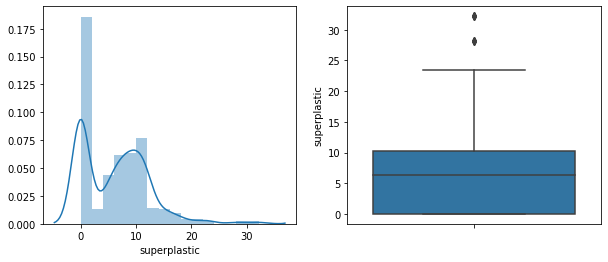

In [30]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['superplastic'])  #Distribution of superplastic

plt.subplot(1,2,2)
sns.boxplot(df['superplastic'],orient='v') #Outlier detection using box plot

plt.show()

#### f) coarseagg       

In [31]:
Q1 = df['coarseagg'].quantile(0.25)
Q3 = df['coarseagg'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['coarseagg'].min())
print('Maximum value is:',df['coarseagg'].max())
print('Range of values is:',df['coarseagg'].max()-df['coarseagg'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['coarseagg'].mean(),3),df['coarseagg'].median()))
print('Standard deviation is:',round(df['coarseagg'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['coarseagg']))

Minimum value is: 801.0
Maximum value is: 1145.0
Range of values is: 344.0
Central values of mean and median respectively are:972.919 and 968.0
Standard deviation is: 77.754
First Quartile is: 932.0
Third Quartile is: 1029.4
Inter Quartile Range is: 97.40000000000009


In [32]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in coarseagg: ', Low_Outlier)
print('Upper outliers in coarseagg: ', Up_Outlier)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [33]:
print('No. of upper outliers in coarseagg : ', df[df['coarseagg']>1175.5000000000002]['coarseagg'].count())
print('No. of lower outliers in coarseagg : ', df[df['coarseagg']<785.8999999999999]['coarseagg'].count())

No. of upper outliers in coarseagg :  0
No. of lower outliers in coarseagg :  0


In [34]:
#skewness
df['coarseagg'].skew()

-0.04021974481106704

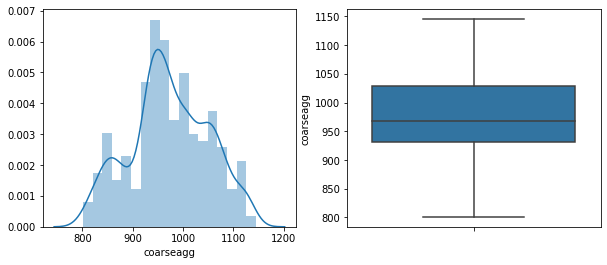

In [35]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['coarseagg'])  #Distribution of coarseagg

plt.subplot(1,2,2)
sns.boxplot(df['coarseagg'],orient='v') #Outlier detection using box plot

plt.show()

#### g) fineagg

In [36]:
Q1 = df['fineagg'].quantile(0.25)
Q3 = df['fineagg'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['fineagg'].min())
print('Maximum value is:',df['fineagg'].max())
print('Range of values is:',df['fineagg'].max()-df['fineagg'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['fineagg'].mean(),3),df['fineagg'].median()))
print('Standard deviation is:',round(df['fineagg'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['fineagg']))

Minimum value is: 594.0
Maximum value is: 992.6
Range of values is: 398.6
Central values of mean and median respectively are:773.58 and 779.5
Standard deviation is: 80.176
First Quartile is: 730.9499999999999
Third Quartile is: 824.0
Inter Quartile Range is: 93.05000000000007


In [37]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in fineagg: ', Low_Outlier)
print('Upper outliers in fineagg: ', Up_Outlier)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [38]:
print('No. of upper outliers in fineagg : ', df[df['fineagg']>963.575]['fineagg'].count())
print('No. of lower outliers in fineagg : ', df[df['fineagg']<591.3749999999998]['fineagg'].count())

No. of upper outliers in fineagg :  5
No. of lower outliers in fineagg :  0


In [39]:
#skewness
df['fineagg'].skew()

-0.25300959769707143

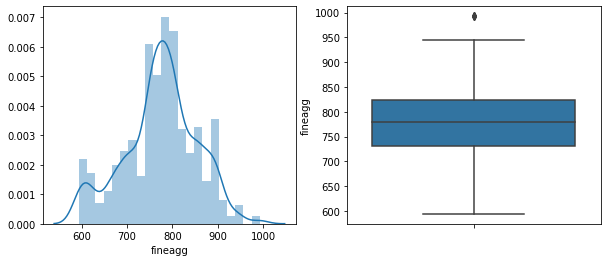

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['fineagg'])  #Distribution of fineagg

plt.subplot(1,2,2)
sns.boxplot(df['fineagg'],orient='v') #Outlier detection using box plot

plt.show()

#### h) age

In [41]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['age'].min())
print('Maximum value is:',df['age'].max())
print('Range of values is:',df['age'].max()-df['age'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['age'].mean(),3),df['age'].median()))
print('Standard deviation is:',round(df['age'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['age']))

Minimum value is: 1
Maximum value is: 365
Range of values is: 364
Central values of mean and median respectively are:45.662 and 28.0
Standard deviation is: 63.17
First Quartile is: 7.0
Third Quartile is: 56.0
Inter Quartile Range is: 49.0


In [42]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in age: ', Low_Outlier)
print('Upper outliers in age: ', Up_Outlier)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [43]:
print('No. of upper outliers in age : ', df[df['age']>129.5]['age'].count())
print('No. of lower outliers in age : ', df[df['age']<-66.5]['age'].count())

No. of upper outliers in age :  59
No. of lower outliers in age :  0


In [44]:
#skewness
df['age'].skew()

3.2691774006345895

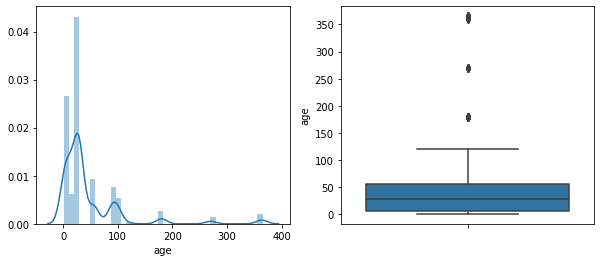

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['age'])  #Distribution of age

plt.subplot(1,2,2)
sns.boxplot(df['age'],orient='v') #Outlier detection using box plot

plt.show()

#### i) strength

In [46]:
Q1 = df['strength'].quantile(0.25)
Q3 = df['strength'].quantile(0.75)
IQR = Q3-Q1
print('Minimum value is:',df['strength'].min())
print('Maximum value is:',df['strength'].max())
print('Range of values is:',df['strength'].max()-df['strength'].min())
print('Central values of mean and median respectively are:{0} and {1}' .format(round(df['strength'].mean(),3),df['strength'].median()))
print('Standard deviation is:',round(df['strength'].std(),3))
print('First Quartile is:',Q1)
print('Third Quartile is:',Q3)
print('Inter Quartile Range is:',stats.iqr(df['strength']))

Minimum value is: 2.33
Maximum value is: 82.6
Range of values is: 80.27
Central values of mean and median respectively are:35.818 and 34.445
Standard deviation is: 16.706
First Quartile is: 23.709999999999997
Third Quartile is: 46.135000000000005
Inter Quartile Range is: 22.425000000000008


In [47]:
#Outlier Detection using IQR
Low_Outlier = Q1-1.5*IQR
Up_Outlier = Q3+1.5*IQR
print('Lower outliers in strength: ', Low_Outlier)
print('Upper outliers in strength: ', Up_Outlier)

Lower outliers in strength:  -9.927500000000013
Upper outliers in strength:  79.77250000000001


In [48]:
print('No. of upper outliers in strength : ', df[df['strength']>79.77250000000001]['strength'].count())
print('No. of lower outliers in strength : ', df[df['strength']<-9.927500000000013]['strength'].count())

No. of upper outliers in strength :  4
No. of lower outliers in strength :  0


In [49]:
#skewness
df['strength'].skew()

0.41697728841071807

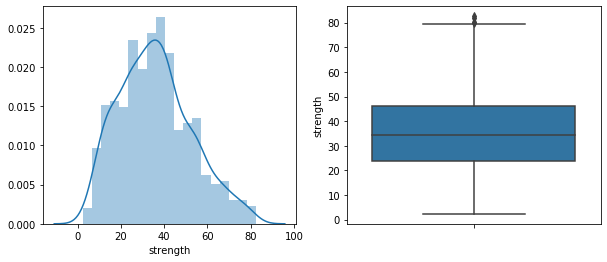

In [50]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) 
sns.distplot(df['strength'])  #Distribution of strength

plt.subplot(1,2,2)
sns.boxplot(df['strength'],orient='v') #Outlier detection using box plot

plt.show()

The following observations can be made:
- Cement has distribution close to normal 
- Slag has right skew and 3 gaussians
- Ash has a slight right skew with 2 gaussians
- Water has a left skew and 2 gaussians
- Superplastic has right skew along with two gaussians
- Coarseagg has almost a normal distribution with 3 gaussians
- Finagg has almost a normal distribution with 2 gaussians
- Age has a high right skew with 5 gaussians 

### ii) Multivariate Analysis

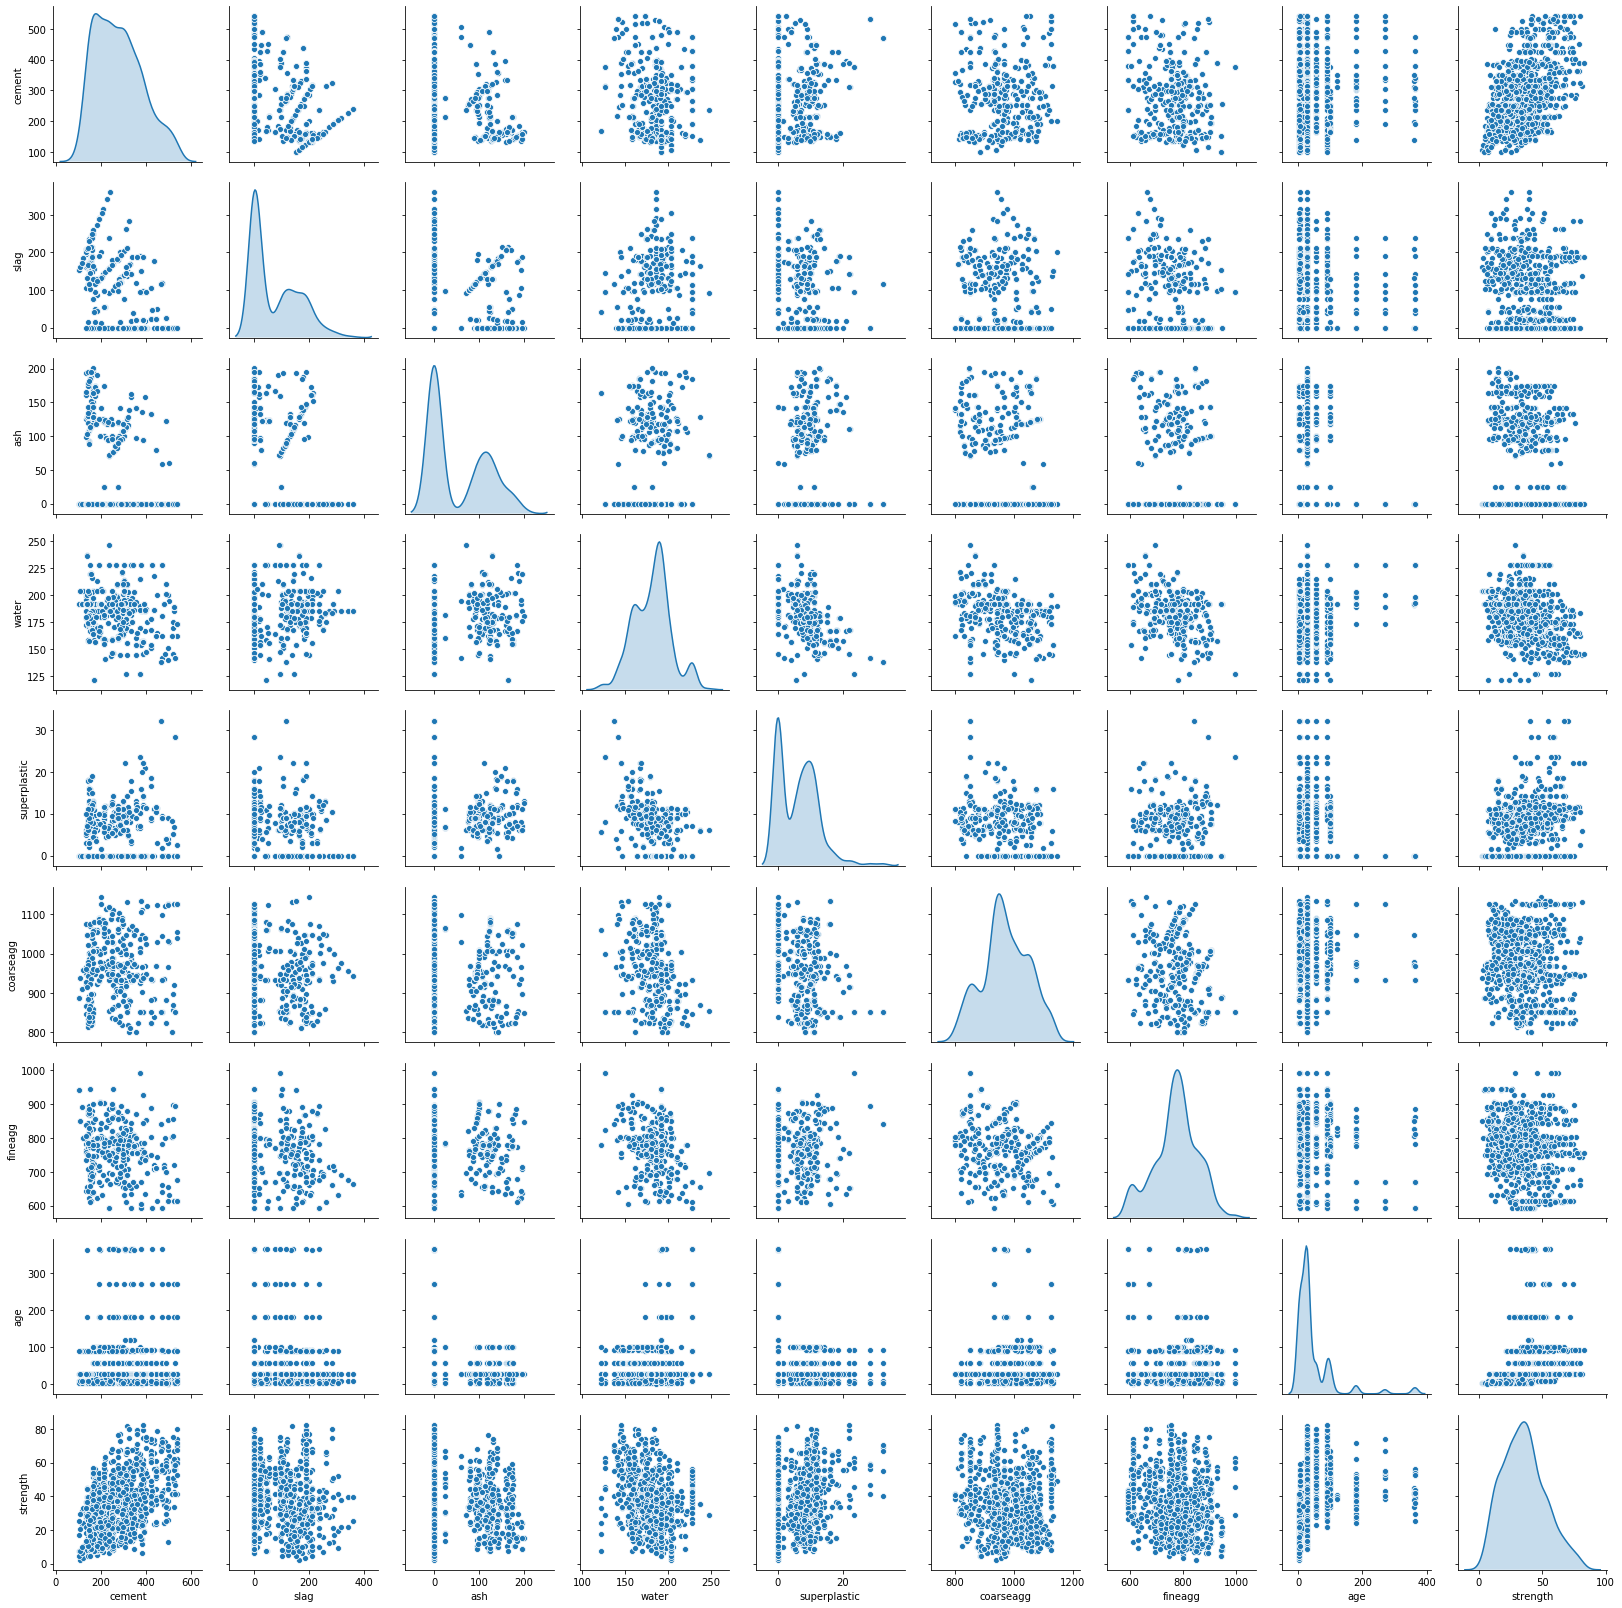

In [51]:
sns.pairplot(df,diag_kind='kde')

Comparision amongst independent attributes
- Cement appears to not have a significant correlation with any other independent attribute
- Slag appears to not have a significant correlation with any other independent attribute
- Ash appears to not have a significant correlation with any other independent attribute
- Water has a negative correlation with superplastic and fineagg
- Superplastic has a negative correlation with water
- coarseagg appears to not have a significant correlation with any other independent attribute
- Fineagg has a negative correlation with water
- Age appears to not have a significant correlation with any other independent attribute


In [52]:
#Correlation matrix
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


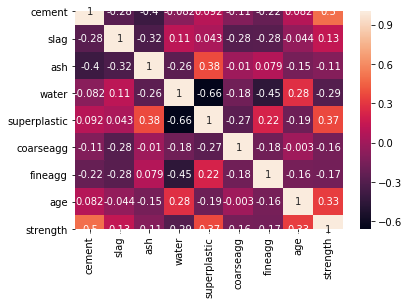

In [53]:
sns.heatmap(df.corr(),annot=True)

We can see that the variables cement and age have correlations to the independent attribute strength. However, for the same values of cement and age, we have multiple values of strenght and these cannot be strong predictors of the dependent variable. 
The rest of the independent variables have no influence on the dependent variable.
It is not a good idea to use a linear model.

### iii) Handling outliers and missing values

In [54]:
#Check if there are missing values
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

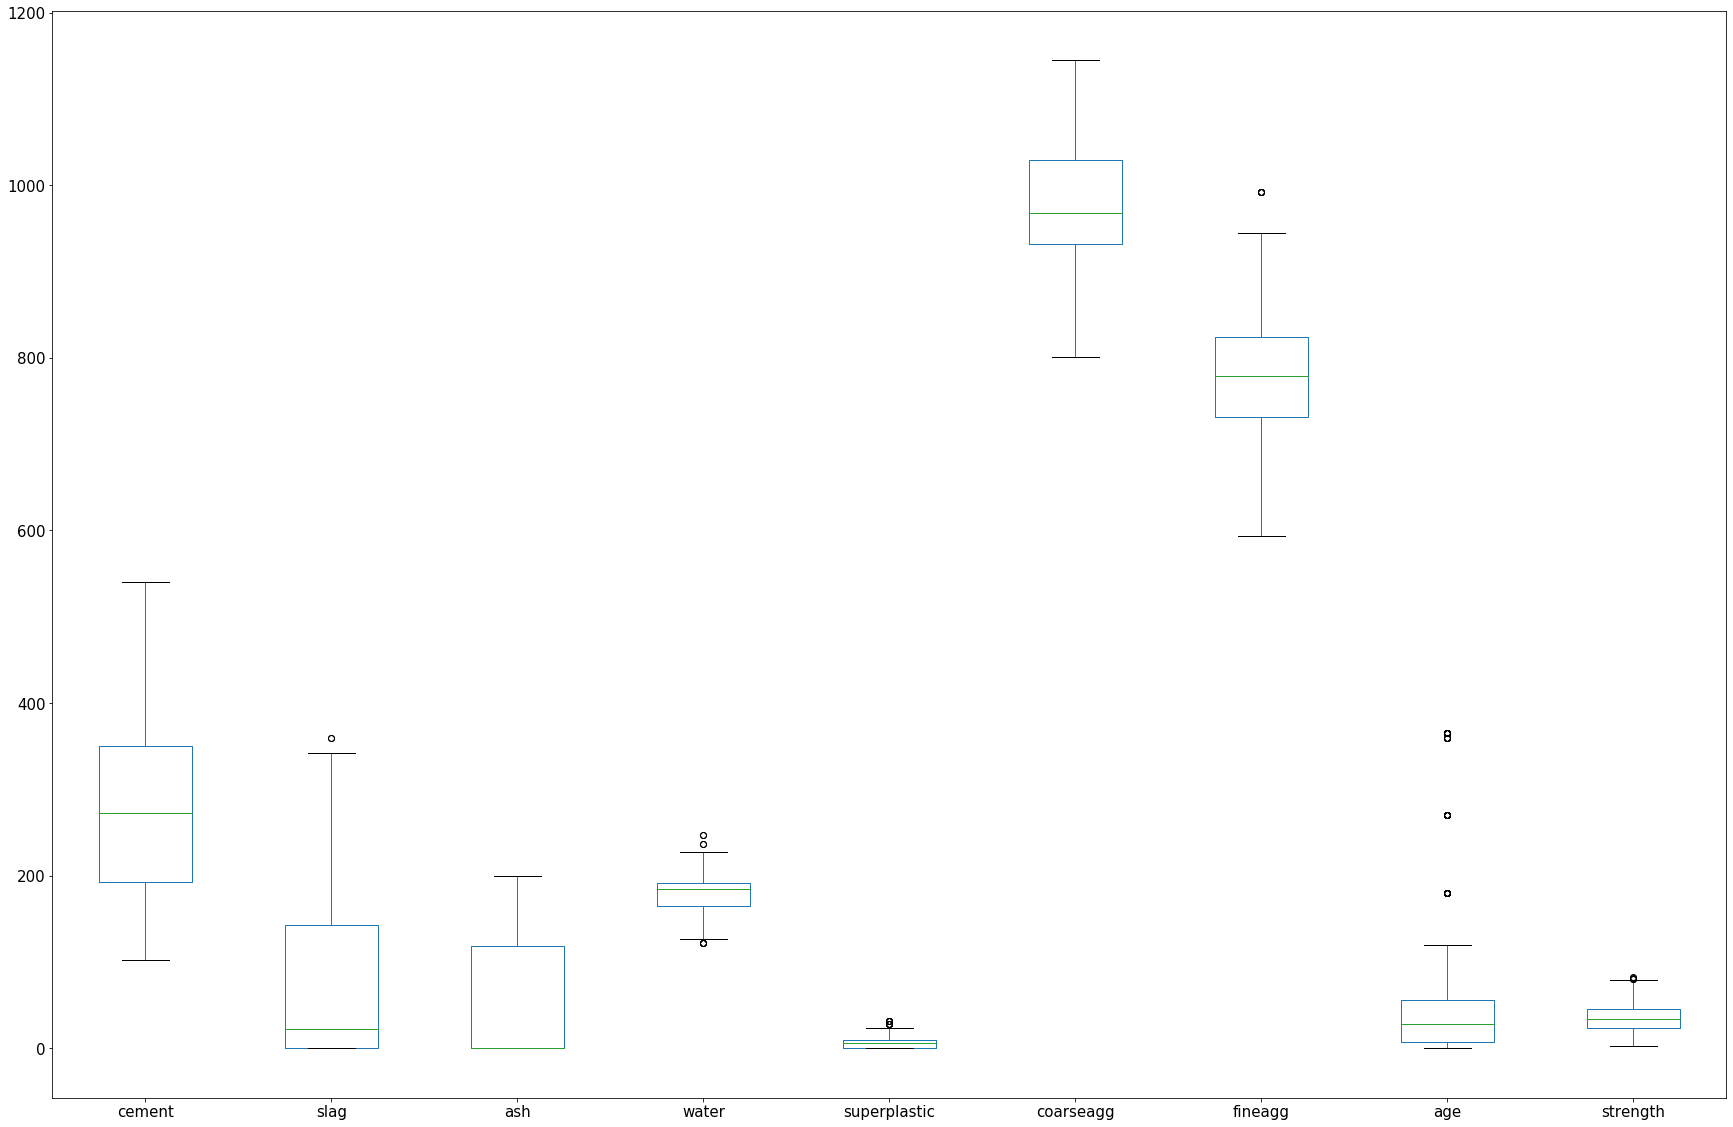

In [55]:
#Boxplot to visualize outliers
df.boxplot(grid=False,figsize=(30,20),fontsize=15)

In [56]:
#To determine the outliers in the dataset using standard deviation method
print('Outliers in Cement: ',df[((df['cement'] - df['cement'].mean()) / df['cement'].std()).abs() >3]['cement'].count())
print('Outliers in Slag: ',df[((df['slag'] - df['slag'].mean()) / df['slag'].std()).abs() >3]['slag'].count())
print('Outliers in Ash: ',df[((df['ash'] - df['ash'].mean()) / df['ash'].std()).abs() >3]['ash'].count())
print('Outliers in Water: ',df[((df['water'] - df['water'].mean()) / df['water'].std()).abs() >3]['water'].count())
print('Outliers in Superplastic: ',df[((df['superplastic'] - df['superplastic'].mean()) / df['superplastic'].std()).abs() >3]['superplastic'].count())
print('Outliers in CoarseAgg: ',df[((df['coarseagg'] - df['coarseagg'].mean()) / df['coarseagg'].std()).abs() >3]['coarseagg'].count())
print('Outliers in FineAgg: ',df[((df['fineagg'] - df['fineagg'].mean()) / df['fineagg'].std()).abs() >3]['fineagg'].count())
print('Outliers in Age: ',df[((df['age'] - df['age'].mean()) / df['age'].std()).abs() >3]['age'].count())



Outliers in Cement:  0
Outliers in Slag:  4
Outliers in Ash:  0
Outliers in Water:  2
Outliers in Superplastic:  10
Outliers in CoarseAgg:  0
Outliers in FineAgg:  0
Outliers in Age:  33


Slag, Ash, Water, Superplastic and Age variables have outliers

In [57]:
#Replacing outliers with the medians

for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    bottom = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df.loc[(df[column]<bottom)|(df[column]>upper)] =df[column].median()

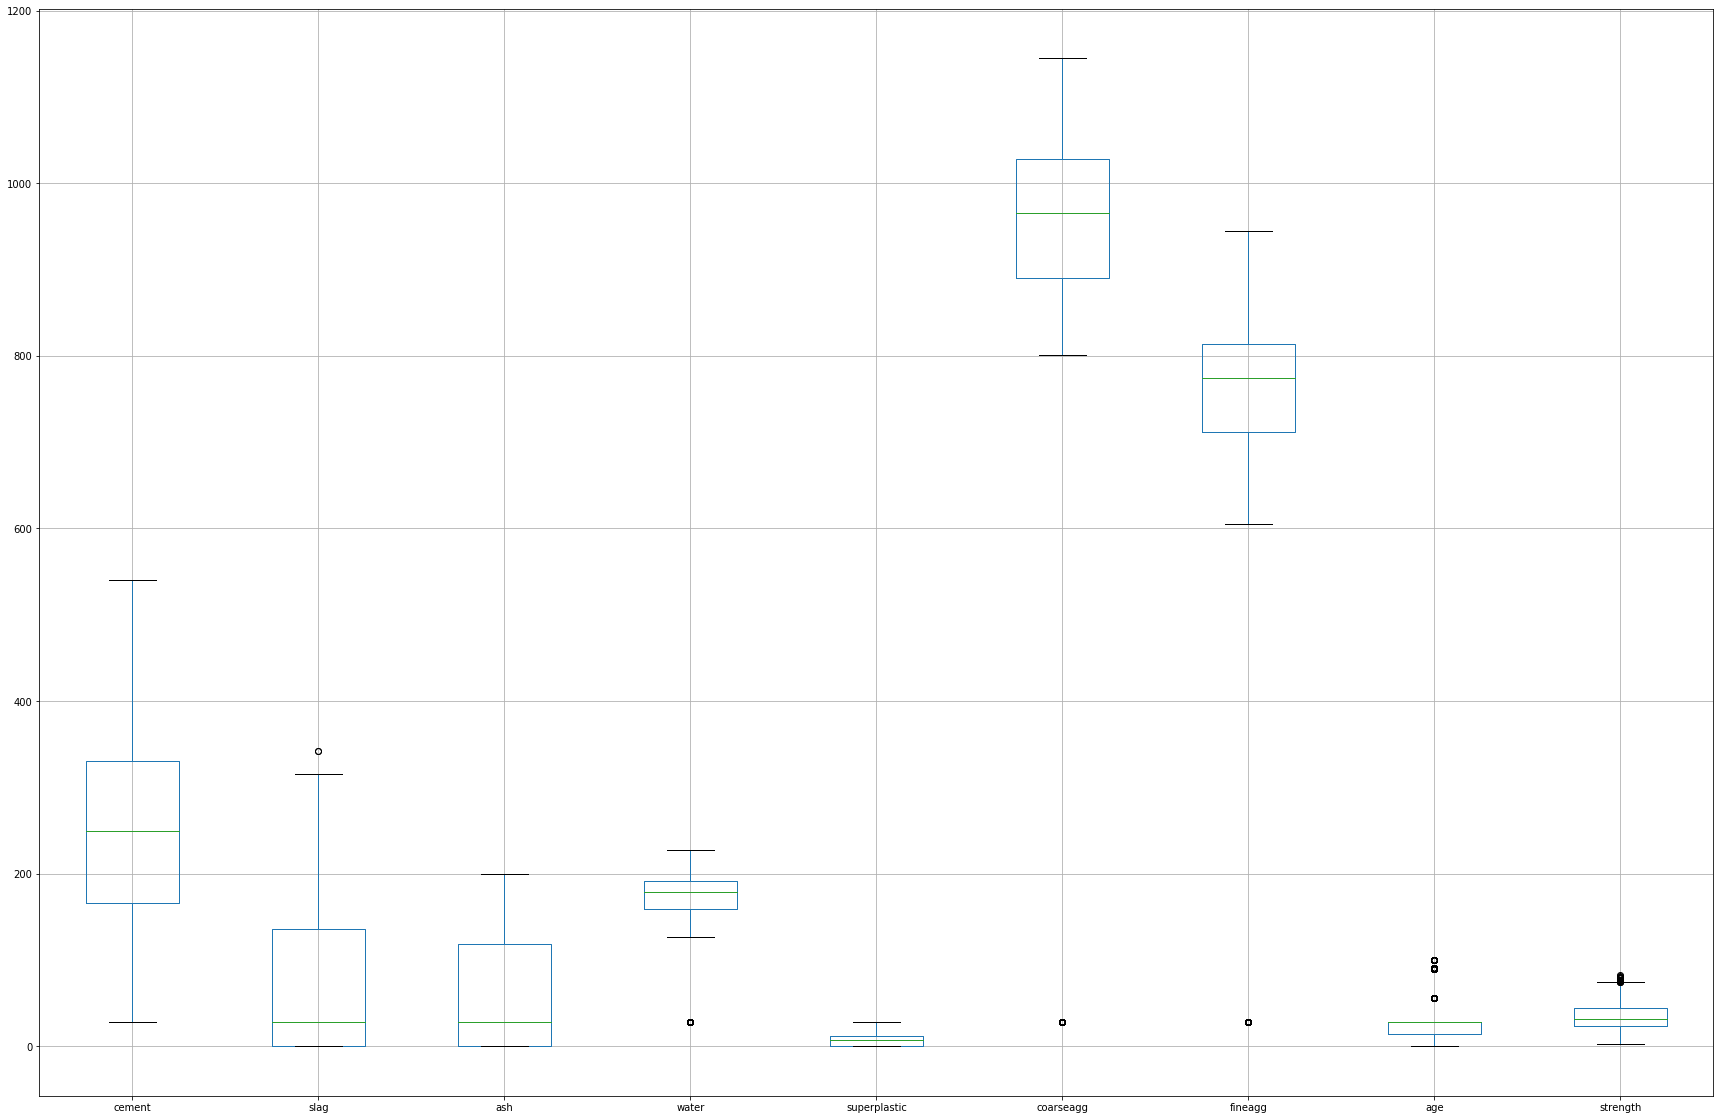

In [58]:
df.boxplot(figsize=(30,20))

## Feature Engineering

In [59]:
# Scaling the data set using zscore
df_z = df.apply(zscore) 

In [60]:
#Splitting the dataset into independent and dependent attributes
X = df_z.iloc[:,0:8]
y = df_z.iloc[:,8]

In [61]:
#Split the dataset into training and testing data
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1) 

#### Decision Tree

In [62]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
pd.DataFrame(tree.feature_importances_,index=X_train.columns,columns=['feat_imp'])

,feat_imp
cement,0.232297
slag,0.042119
ash,0.051912
water,0.115950
superplastic,0.084550
coarseagg,0.032248
fineagg,0.030572
age,0.410351


Cement, Water and Age are the important variables and the remaining variables have lower influence on the dependent variable. The same was observed in the heatmap and pairplot.

In [63]:
y_pred = tree.predict(X_test)

In [64]:
print('Score on training data',tree.score(X_train,y_train))
print('Score on testing data',tree.score(X_test,y_test))

Score on training data 0.9945306587104614
Score on testing data 0.8237131635710715


In [65]:
acc_dt = metrics.r2_score(y_pred,y_test)
print('Accuracy of decision tree model is',acc_dt)
print('Mean squared error is',metrics.mean_squared_error(y_pred,y_test))

Accuracy of decision tree model is 0.8146323759678649
Mean squared error is 0.1864665482981602


We can see the model is overfitting as the training accuracy is over 99% but the testing accuracy is around 83%

In [66]:
result = pd.DataFrame({'Model':['Decision Tree'], 'Accuracy': acc_dt},index={'1'})
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632


#### K Fold Cross Validation

In [67]:
n_fold = 10
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(tree,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

Mean Accuracy:  0.8440350950189621
Standard Deviation:  0.03226519889895252


C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [68]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['DTree KFold'], 'Accuracy': [Accuracy]},index={'2'})
tempResultsDf
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035


#### Dropping lowest significant variable

In [69]:
X = df_z.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y=df_z['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [70]:
tree = DecisionTreeRegressor()
tree.fit(X_train , y_train)
pd.DataFrame(tree.feature_importances_,index=X_train.columns,columns=['feat_imp'])

,feat_imp
cement,0.290099
slag,0.059664
water,0.134377
superplastic,0.104206
age,0.411654


In [71]:
y_pred = tree.predict(X_test)
print('Score on training data',tree.score(X_train,y_train))
print('Score on testing data',tree.score(X_test,y_test))
acc_dt = metrics.r2_score(y_pred,y_test)
print('Accuracy of decision tree model is',acc_dt)
print('Mean squared error is',metrics.mean_squared_error(y_pred,y_test))

Score on training data 0.9940907633337072
Score on testing data 0.8118594486062163
Accuracy of decision tree model is 0.8034383972248544
Mean squared error is 0.19900475795000744


The model is still an overfit

In [72]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['DTreeDrop'], 'Accuracy': [acc_dt]},index={'3'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438


#### Pruning the Tree

In [73]:
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [74]:
# Regularizing the Decision tree classifier and fitting the model
reg_tree = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_tree.fit(X_train, y_train)
print (pd.DataFrame(reg_tree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.207383
slag          0.015576
ash           0.038245
water         0.113618
superplastic  0.093770
coarseagg     0.006531
fineagg       0.018943
age           0.505933


In [75]:
y_pred = reg_tree.predict(X_test)

# Score on train data
print('Score on training data using DT:',reg_tree.score(X_train,y_train))
# Score on test data
print('Score on testing data using DT:',reg_tree.score(X_test,y_test))
#Evaluate the model using accuracy
acc_rdt=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_rdt)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using DT: 0.7524374834749552
Score on testing data using DT: 0.6745319157751265
Accuracy DT:  0.6745319157751265
MSE:  0.3442622913656646


In [76]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Pruned Decision Tree'], 'Accuracy': [acc_rdt]},index={'4'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532


#### K Fold Cross Validation

In [77]:
n_fold = 10
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(reg_tree,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

Mean Accuracy:  0.6706819178286998
Standard Deviation:  0.05697503215885914


C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [78]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Pruned DTree KFold'], 'Accuracy': [Accuracy]},index={'5'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682


#### K Means Clustering

In [79]:
n_clusters = range( 1, 15 )  
cluster_errors = []
for num_clusters in n_clusters:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":n_clusters, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1.757979e+08
1,2,3.218162e+07
2,3,2.430848e+07
3,4,1.849538e+07
4,5,1.607450e+07
5,6,1.434622e+07
6,7,1.298442e+07
7,8,1.187408e+07
8,9,1.062603e+07
9,10,9.459319e+06


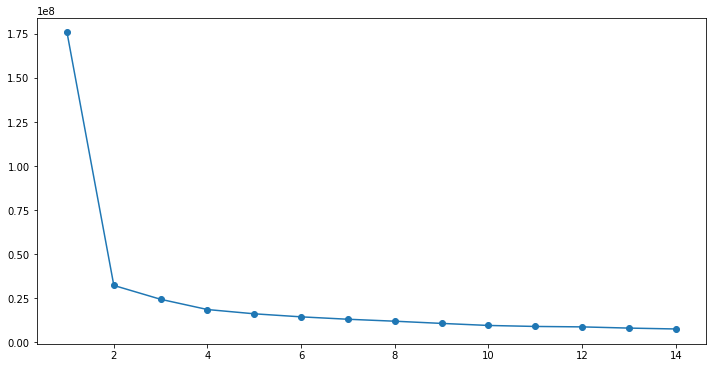

In [80]:
# Finding elbow point
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [81]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 1 )
cluster.fit(df_z)

KMeans(n_clusters=6, random_state=1)

In [82]:
# Create a new column "Cluster" for cluster number of each record
prediction=cluster.predict(df_z)
df_z["Group"] = prediction    

# Make a copy of the dataset
df_z_copy = df_z.copy(deep = True)

In [83]:
centroids = cluster.cluster_centers_
centroids

array([[-0.16167995, -0.32514538,  1.14174998,  0.26907439,  0.0525449 ,
         0.28713627,  0.3318205 , -0.3468805 , -0.33122475],
       [ 0.77053416, -0.81519657, -0.90290608,  0.52443258, -0.99580848,
         0.49194192,  0.32217452, -0.57494293, -0.60989629],
       [-1.82459321, -0.49656093, -0.44988853, -2.80992705,  2.36510047,
        -2.90292152, -2.87083147, -0.1360366 , -0.3913029 ],
       [-0.06752052, -0.24672836,  0.24517236,  0.32680896, -0.41539519,
         0.40292409,  0.40924569,  2.05447691,  0.65311175],
       [-0.3758472 ,  1.47419377, -0.87665507,  0.49387009, -0.6430176 ,
         0.31924288,  0.25171163, -0.58033868, -0.64923759],
       [ 1.12641955,  0.53976969, -0.53524343,  0.03003813,  0.242792  ,
         0.18014935,  0.28271481,  0.23713093,  1.52432575]])

In [84]:
centroid_df = pd.DataFrame(centroids, columns = list(df) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.161680,-0.325145,1.141750,0.269074,0.052545,0.287136,0.331820,-0.346881,-0.331225
1,0.770534,-0.815197,-0.902906,0.524433,-0.995808,0.491942,0.322175,-0.574943,-0.609896
2,-1.824593,-0.496561,-0.449889,-2.809927,2.365100,-2.902922,-2.870831,-0.136037,-0.391303
3,-0.067521,-0.246728,0.245172,0.326809,-0.415395,0.402924,0.409246,2.054477,0.653112
4,-0.375847,1.474194,-0.876655,0.493870,-0.643018,0.319243,0.251712,-0.580339,-0.649238
5,1.126420,0.539770,-0.535243,0.030038,0.242792,0.180149,0.282715,0.237131,1.524326


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002090B92EB08>,
      dtype=object)

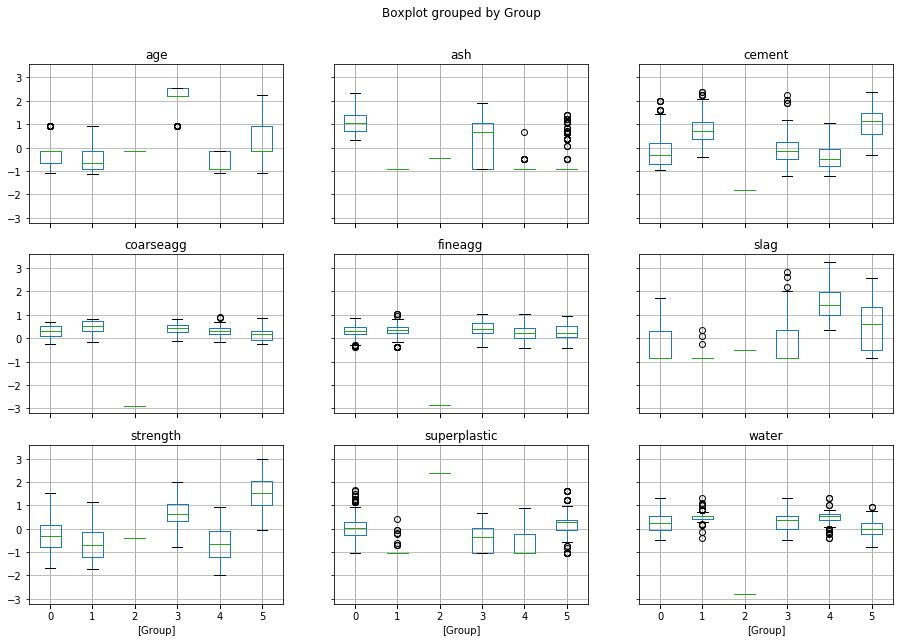

In [85]:
#Visual Analysis by converting the centroids and the data in the cluster into box plots
df_z.boxplot(by = 'Group',  layout=(3,3), figsize=(15, 10))

- Dimensions are not good predictors of target variable.
- In all variables, clusters have values.
- Cluster bodies overlap


In [86]:
X=df_z.iloc[:,0:8]
y = df_z.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### Random Forest

In [87]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred = model.predict(X_test)

# Score on train data
print('Score on training data using RFR:',model.score(X_train,y_train))

# performance on test data
print('Score on testing data using RFR:',model.score(X_test,y_test))

#Evaluate the model using accuracy
acc_rf=metrics.r2_score(y_test, y_pred)
print('Accuracy rf: ',acc_rf)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using RFR: 0.9823817774864451
Score on testing data using RFR: 0.8972421915724107
Accuracy rf:  0.8972421915724107
MSE:  0.10869157468771663


Random Forest Model is overfit 

In [89]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Random Forest'], 'Accuracy': [acc_rf]},index={'6'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242


#### K Fold Cross Validation

In [90]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(model,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.9121589550163003
Standard Deviation:  0.034418396104028415


In [91]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Random Forest K Fold'], 'Accuracy': [acc_rf]},index={'7'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result


,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242


#### Gradient Boost

In [92]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [93]:
y_pred = model.predict(X_test)

# Score on train data
print('Score on training data using GBR:',model.score(X_train,y_train))

# Score on test data
print('Score on testing data using GBR:',model.score(X_test,y_test))

#Evaluate the model  accuracy
acc_gb=metrics.r2_score(y_test, y_pred)
print('Accuracy gb: ',acc_gb)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using GBR: 0.9542381599434866
Score on testing data using GBR: 0.8971852354546808
Accuracy gb:  0.8971852354546808
MSE:  0.10875181974567279


In [94]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Gradient Boost'], 'Accuracy': [acc_gb]},index={'8'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185


#### K fold cross validation

In [95]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(model,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.9041206705584998
Standard Deviation:  0.034801976391532013


In [96]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Gradient Boost K Fold'], 'Accuracy': [Accuracy]},index={'9'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121


#### Ada Boost

In [97]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [98]:
y_pred = model.predict(X_test)

# Score on train data
print('Score on training data using Ada Boost:',model.score(X_train,y_train))

# Score on test data
print('Score on testing data using Ada Boost:',model.score(X_test,y_test))

#Evaluate the model performance
acc_ab=metrics.r2_score(y_test, y_pred)
print('Accuracy ab: ',acc_ab)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using Ada Boost: 0.8204450745124635
Score on testing data using Ada Boost: 0.7684777768043307
Accuracy ab:  0.7684777768043307
MSE:  0.2448915114034478


In [99]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Ada Boost'], 'Accuracy': [acc_ab]},index={'10'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### K fold cross validation

In [100]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(model,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.7871475994216455
Standard Deviation:  0.05277884850078253


In [101]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Ada Boost K Fold'], 'Accuracy': [Accuracy]},index={'11'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### Bagging

In [102]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [103]:
y_pred = model.predict(X_test)

# Score on train data
print('Score on training data using GBR:',model.score(X_train,y_train))

# Score on test data
print('Score on testing data using GBR:',model.score(X_test,y_test))

#Evaluate the model using accuracy
acc_br=metrics.r2_score(y_test, y_pred)
print('Accuracy br: ',acc_br)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using GBR: 0.9765135528947535
Score on testing data using GBR: 0.8789193440475154
Accuracy br:  0.8789193440475154
MSE:  0.12807247800512428


In [104]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Bagging'], 'Accuracy': [acc_br]},index={'12'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### K fold cross validation

In [105]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(model,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.9062478181774722
Standard Deviation:  0.04119972976738905


In [106]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Bagging K Fold'], 'Accuracy': [Accuracy]},index={'13'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### KNN Regressor

In [107]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

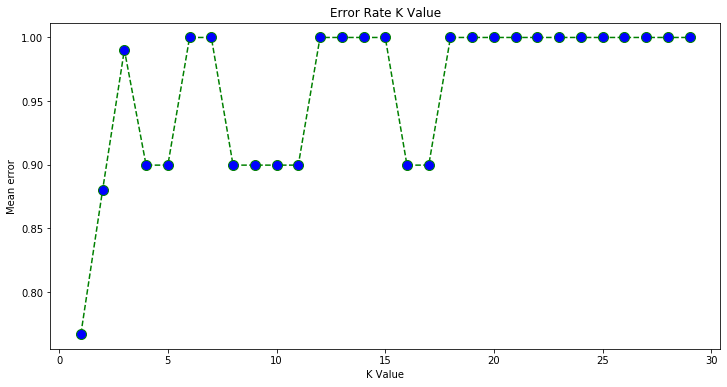

In [108]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='green', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [109]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [110]:
y_pred = model.predict(X_test)

# Score on train data
print('Score on training data using KNNR:',model.score(X_train,y_train))

# Score on test data
print('Score on testing data using KNNR:',model.score(X_test,y_test))

#Evaluate the model performance
acc_k=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_k)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using KNNR: 0.9120627399300683
Score on testing data using KNNR: 0.8232423249523411
Accuracy KNNR:  0.8232423249523411
MSE:  0.18696457556904805


In [111]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['KNNR'], 'Accuracy': [acc_k]},index={'14'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### K fold cross validation

In [112]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(model,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.8324294180196476
Standard Deviation:  0.05217852055363453


In [113]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['KNNR KFold'], 'Accuracy': [Accuracy]},index={'15'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### Support Vector Regressor

In [114]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [115]:
y_pred = model.predict(X_test)

# Score on train data
print('Score on training data using SVR:',model.score(X_train,y_train))

# Score on test data
print('Score on testing data using SVR:',model.score(X_test,y_test))

#Evaluate the model performance
acc_s=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_s)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using SVR: 0.7780226796104313
Score on testing data using SVR: 0.7712459800288728
Accuracy SVR:  0.7712459800288728
MSE:  0.2419634578361794


In [116]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['SVR'], 'Accuracy': [acc_s]},index={'16'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### K fold cross validation

In [117]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(model,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.7589234919243938
Standard Deviation:  0.07235754557416717


In [118]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['SVR KFold'], 'Accuracy': [Accuracy]},index={'17'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


In [119]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [120]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KN', KNeighborsRegressor(n_neighbors=3)),
                            ('SVM', SVR(kernel='linear'))])

In [121]:
y_pred = evc.predict(X_test)

# Score on train data
print('Score on training data using Ensemble:',evc.score(X_train,y_train))

# Score on test data
print('Score on testing data using Ensemble:',evc.score(X_test,y_test))

#Evaluate the model performance
acc_ens=metrics.r2_score(y_test, y_pred)
print('Accuracy Ensemble: ',acc_ens)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Score on training data using Ensemble: 0.8575788062362009
Score on testing data using Ensemble: 0.8206075712233318
Accuracy Ensemble:  0.8206075712233318
MSE:  0.18975147357808977


In [122]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Ensemble'], 'Accuracy': [acc_ens]},index={'18'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


#### K fold cross validation

In [123]:
n_fold = 20
seed = 1
kfold = KFold(n_splits=n_fold, random_state=seed)
result1 = cross_val_score(evc,X, y, cv=kfold)
Accuracy=np.mean(abs(result1))
print('Mean Accuracy: ',Accuracy)
print('Standard Deviation: ',result1.std())

C:\Users\Srikanta\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy:  0.8217096464141307
Standard Deviation:  0.053814635642176784


In [124]:
#Storing results in a dataframe
tempResultsDf = pd.DataFrame({'Model':['Ensemble KFold'], 'Accuracy': [Accuracy]},index={'19'})
result = pd.concat([result, tempResultsDf])
result = result[['Model', 'Accuracy']]
result

,Model,Accuracy
1,Decision Tree,0.814632
2,DTree KFold,0.844035
3,DTreeDrop,0.803438
4,Pruned Decision Tree,0.674532
5,Pruned DTree KFold,0.670682
6,Random Forest,0.897242
7,Random Forest K Fold,0.897242
8,Gradient Boost,0.897185
9,Gradient Boost K Fold,0.904121
10,Ada Boost,0.768478


From the above table we see Random Forest, Gradient Boost and Bagging provide better results in comparision to other models 

#### Bootstrap Sampling

In [125]:
df_join = X.join(y)

In [ ]:
#### Gradient Boost Regressor

In [126]:
values = df_join.values

# total number of samples
n_iterations = 100      

# size of each bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

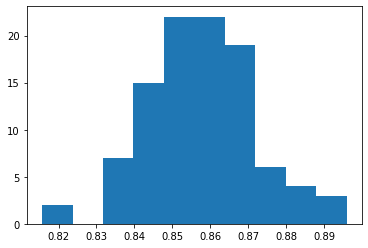

95.0 confidence interval 83.5% and 88.8%


In [127]:
# plot scores
plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)

lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Random Forest Regressor

In [129]:
values = df_join.values
# Number of bootstrap samples to create
n_iterations = 100        
# size of a bootstrap sample
n_size = int(len(df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

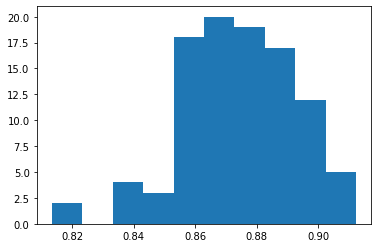

95.0 confidence interval 83.9% and 90.8%


In [130]:
# plot scores

plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

At 95% confidence interval the bootstrap random forest model gives a performance of 83.9% and 90.8%